In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from statsmodels.formula.api import ols


In [4]:
# Load the dataset 
dodgers = pd.read_csv("C:\BU\DSC630\wk3/dodgers.csv")

dodgers.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


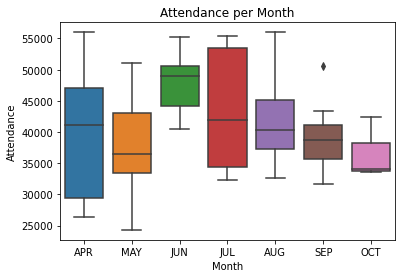

In [61]:
# Explore attendance distribution by month, day of the week, and opponent. 
plt.figure()
plt.subplot(1, 1, 1)
sns.boxplot(x='month', y='attend', data=df)
_ = plt.xlabel('Month')
_ = plt.ylabel('Attendance')
_ = plt.title('Attendance per Month')



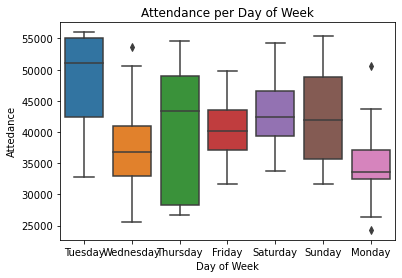

In [62]:
plt.subplot(1, 1, 1)
sns.boxplot(x='day_of_week', y='attend', data=df)
_ = plt.xlabel('Day of Week')
_ = plt.ylabel('Attedance')
_ = plt.title('Attendance per Day of Week')



A few things stand out here. It looks like Mondays and Wednesdays are the days of the week where fans aren't coming out for baseball. That makes sense because Monday stands the week start and the wednesday is bump day; most people are either working or in school during the day, and at night might not come out due to getting an early start the next day for work or school.

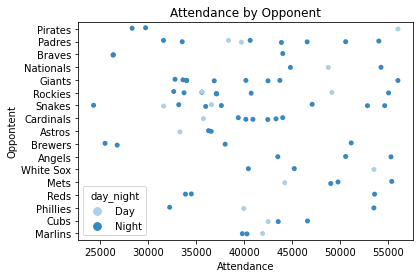

In [63]:
plt.subplot(1, 1, 1)
sns.stripplot(x='attend', y='opponent', data=df, hue='day_night', palette='Blues')
_ = plt.xlabel('Attendance')
_ = plt.ylabel('Oppontent')
_ = plt.title('Attendance by Opponent')

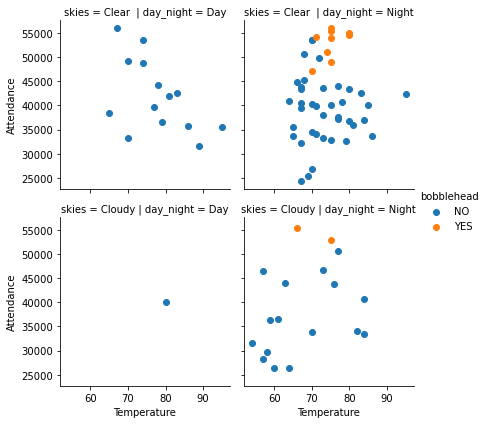

In [64]:
# Explore attendance by temperature and bobblehead promotion
g = sns.FacetGrid(df, col='day_night', row='skies', hue='bobblehead')
g = (g.map(plt.scatter, 'temp', 'attend').add_legend())
g = g.set_axis_labels('Temperature', 'Attendance')

In [77]:
# Create a new data frame keeping month, day_of_week, bobblehead, and attendance columns.
df2 = df[['month', 'day_of_week', 'bobblehead', 'attend']]

In [78]:
# Use LabelEncoder to convert month, day_of_week, and bobblehead to numeric values.
le = LabelEncoder()
indexCols = ['month', 'day_of_week', 'bobblehead']
for i in indexCols:
    df2.loc[:,i] = le.fit_transform(df2.loc[:,i])

C:\Users\aditya.sumbaraju\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [79]:
# Estabilsh a random seed and split the data into train and test sets. 
# Now we can use the train_test_split function in order to make the split. 
# The test_size=0.3 inside the function indicates the percentage of the data that should be held over for testing. 
# It’s usually around 80/20 or 70/30:

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(df2[['month', 'day_of_week', 'bobblehead']], df2['attend'], test_size=0.3)

In [80]:
print(X_train.shape, y_train.shape)
## (64, 1) (64,)
print(X_test.shape, y_test.shape)
## (17, 1) (17,)

(56, 3) (56,)
(25, 3) (25,)


In [83]:
# Build the linear model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

In [84]:
predictions = lm.predict(X_test)
print(predictions)

[38597.89128985 37916.3111395  38179.16995038 52391.31137127
 38566.71878413 37597.84669975 53066.15213906 37535.50168831
 38497.63439014 38566.71878413 38629.06379557 38791.66570673
 38116.82493894 38210.3424561  38504.37377269 38241.51496182
 38310.59935582 38854.01071817 38660.23630129 38629.06379557
 38885.18322389 52647.43079958 38303.85997326 37853.96612806
 38404.11687298]


Text(0, 0.5, 'Predictions')

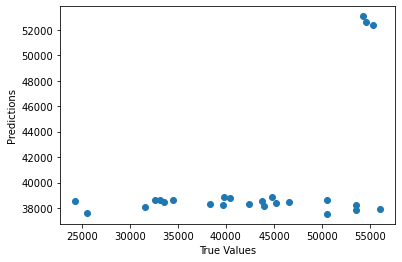

In [85]:
#let's plot that training model:
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [69]:
# Print the model results.
print('Model Score:', model.score(X_train, y_train))
print('Y-Intercept:',model.intercept_)
print(list(zip(indexCols, model.coef_)))

Model Score: 0.4333547706865034
Y-Intercept: 38885.183223889464
[('month', -31.1725057198039), ('day_of_week', -193.77441687713488), ('bobblehead', 14568.517748922892)]


The model predicts that a bobblehead event would increase attendance by 14,569 thousand fans.

In [74]:
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [75]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const          38885.183224
month            -31.172506
day_of_week     -193.774417
bobblehead     14568.517749
dtype: float64

In [76]:
# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 attend   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     13.26
Date:                Thu, 16 Sep 2021   Prob (F-statistic):           1.52e-06
Time:                        20:06:55   Log-Likelihood:                -564.24
No. Observations:                  56   AIC:                             1136.
Df Residuals:                      52   BIC:                             1145.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.889e+04   1948.455     19.957      0.000     3.5e+04    4.28e+04
month         -31.1725    411.714     -0.076      0.940    -857.337     794.992
day_of_week  -193.7744    388.374     -0.499      0.620    -973.104     585.555
bobblehead   1.457e+04   2342.482      6.219      0.000    9867.983    1.93e+04
==============================================================================
Omnibus:                        0.841   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.657   Jarque-Bera (JB):                0.386
Skew:                           0.186   Prob(JB):                        0.824
Kurtosis:                       3.164   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
fit = ols('attend ~ C(month) + C(day_of_week)', data=dodgers).fit() 

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 attend   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     3.954
Date:                Thu, 16 Sep 2021   Prob (F-statistic):           0.000128
Time:                        21:54:35   Log-Likelihood:                -823.91
No. Observations:                  81   AIC:                             1674.
Df Residuals:                      68   BIC:                             1705.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    3.805e+04   2661.948     14.293      0.000    3.27e+04    4.34e+04
C(month)[T.AUG]              3965.9784   2681.525      1.479      0.144   -1384.921    9316.878
C(month)[T.JUL]              4768.3867   2868.802      1.662      0.101    -956.218    1.05e+04
C(month)[T.JUN]              8753.4054   3057.367      2.863      0.006    2652.524    1.49e+04
C(month)[T.MAY]             -1957.7296   2583.531     -0.758      0.451   -7113.086    3197.627
C(month)[T.OCT]             -1500.1929   4561.773     -0.329      0.743   -1.06e+04    7602.683
C(month)[T.SEP]              -692.4947   2839.495     -0.244      0.808   -6358.619    4973.630
C(day_of_week)[T.Monday]    -4991.2625   2826.580     -1.766      0.082   -1.06e+04     649.091
C(day_of_week)[T.Saturday]   3314.3441   2717.208      1.220      0.227   -2107.761    8736.449
C(day_of_week)[T.Sunday]     2816.8071   2727.510      1.033      0.305   -2625.855    8259.469
C(day_of_week)[T.Thursday]    347.0261   3643.149      0.095      0.924   -6922.765    7616.818
C(day_of_week)[T.Tuesday]    7931.2545   2762.345      2.871      0.005    2419.080    1.34e+04
C(day_of_week)[T.Wednesday] -2468.0392   2805.030     -0.880      0.382   -8065.390    3129.311
==============================================================================
Omnibus:                        1.089   Durbin-Watson:                   2.163
Prob(Omnibus):                  0.580   Jarque-Bera (JB):                1.008
Skew:                           0.266   Prob(JB):                        0.604
Kurtosis:                       2.877   Cond. No.                         8.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
fit1 = ols('attend ~ C(month) + C(day_of_week)+ C(bobblehead)', data=dodgers).fit() 

fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 attend   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     6.158
Date:                Thu, 16 Sep 2021   Prob (F-statistic):           2.08e-07
Time:                        21:56:52   Log-Likelihood:                -813.52
No. Observations:                  81   AIC:                             1655.
Df Residuals:                      67   BIC:                             1689.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    3.879e+04   2364.676     16.405      0.000    3.41e+04    4.35e+04
C(month)[T.AUG]              2377.9243   2402.915      0.990      0.326   -2418.314    7174.162
C(month)[T.JUL]              2849.8281   2578.600      1.105      0.273   -2297.079    7996.735
C(month)[T.JUN]              7163.2336   2732.721      2.621      0.011    1708.699    1.26e+04
C(month)[T.MAY]             -2385.6248   2291.216     -1.041      0.302   -6958.912    2187.662
C(month)[T.OCT]              -662.6677   4046.452     -0.164      0.870   -8739.419    7414.083
C(month)[T.SEP]                29.0302   2521.249      0.012      0.991   -5003.404    5061.464
C(day_of_week)[T.Monday]    -4883.8183   2504.653     -1.950      0.055   -9883.127     115.490
C(day_of_week)[T.Saturday]   1488.2375   2442.681      0.609      0.544   -3387.374    6363.849
C(day_of_week)[T.Sunday]     1840.1843   2426.794      0.758      0.451   -3003.716    6684.085
C(day_of_week)[T.Thursday]  -4108.4545   3381.219     -1.215      0.229   -1.09e+04    2640.487
C(day_of_week)[T.Tuesday]    3027.6753   2686.427      1.127      0.264   -2334.455    8389.806
C(day_of_week)[T.Wednesday] -2423.7951   2485.461     -0.975      0.333   -7384.795    2537.205
C(bobblehead)[T.YES]         1.071e+04   2419.520      4.429      0.000    5885.521    1.55e+04
==============================================================================
Omnibus:                        6.343   Durbin-Watson:                   2.130
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                5.908
Skew:                           0.654   Prob(JB):                       0.0521
Kurtosis:                       3.205   Cond. No.                         8.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Final Recommendation
After going through the data in different ways, including scatter plots, box plots, and regression analysis, my main recommendation is for the Dodgers marketing department to plan to offer more giveaway items, in particular, bobbleheads. Looking through the data, they had a large turnout on Tuesdays, primarily due to bobblehead giveaways.

To answer the original problem — "What night would be the best to run a marketing promotion to increase attendance?" — my recommendation is to start offering bobbleheads on Mondays to help bring more people out.If we observe the coef of promo-set vs non-promo set it is evident that there is huge spike on tuesdays due to promo launch. Mondays were the lowest draw during the week, so giving the fans a reason to show up by giving them a freebie would be a good way to get attendance boosted on that day. 